<a href="https://colab.research.google.com/github/Rustydinoco/ML_Learning/blob/master/Segmentasi_Negara_Berdasarkan_Keadaan_Ekonomi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from google.colab import drive
from sklearn.decomposition import PCA
from scipy.stats import zscore



In [73]:
#Type your code here
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Dataset ML/Country_Data.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [74]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [75]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [76]:
df.shape

(167, 10)

In [77]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [78]:
df1 = df.copy()
df1.drop(columns = ['country',"child_mort","health","life_expec","total_fer","inflation"], axis = 1, inplace = True)
df1.head()

,exports,imports,income,gdpp
0,10.0,44.9,1610,553
1,28.0,48.6,9930,4090
2,38.4,31.4,12900,4460
3,62.3,42.9,5900,3530
4,45.5,58.9,19100,12200


In [79]:
MinMaxScaler = MinMaxScaler()
df_scaled = MinMaxScaler.fit_transform(df1)
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)
df_scaled.head()

,exports,imports,income,gdpp
0,0.049482,0.257765,0.008047,0.003073
1,0.139531,0.279037,0.074933,0.036833
2,0.191559,0.180149,0.098809,0.040365
3,0.311125,0.246266,0.042535,0.031488
4,0.227079,0.338255,0.148652,0.114242


In [80]:
for k in range (2,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  labels = kmeans.fit_predict(df_scaled)
  score = silhouette_score(df_scaled, labels)
  print(f"Jumlah Cluster: {k}, Silhouette Score: {score}")

Jumlah Cluster: 2, Silhouette Score: 0.5337808703068949
Jumlah Cluster: 3, Silhouette Score: 0.35055477619433334
Jumlah Cluster: 4, Silhouette Score: 0.33076793226256096
Jumlah Cluster: 5, Silhouette Score: 0.38092994452001655
Jumlah Cluster: 6, Silhouette Score: 0.37939321115784647
Jumlah Cluster: 7, Silhouette Score: 0.37904336681486134
Jumlah Cluster: 8, Silhouette Score: 0.3472095001206713
Jumlah Cluster: 9, Silhouette Score: 0.32476733968298827
Jumlah Cluster: 10, Silhouette Score: 0.2828134161378069


In [81]:
#dbscan = DBSCAN(eps=0.3,min_samples=10)
#labels = kmeans.fit_predict(df_scaled)
#score = silhouette_score(df_scaled, labels)
#print(f"Jumlah Cluster: {k}, Silhouette Score: {score}")

In [82]:
kmeans = KMeans(n_clusters= 2 ,random_state=42)
labels = kmeans.fit_predict(df_scaled)
score = silhouette_score(df_scaled, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5337808703068949


In [83]:
df["cluster"] = labels
df.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [84]:
df_scaled["cluster"]= labels
df_scaled.head()

,exports,imports,income,gdpp,cluster
0,0.049482,0.257765,0.008047,0.003073,0
1,0.139531,0.279037,0.074933,0.036833,0
2,0.191559,0.180149,0.098809,0.040365,0
3,0.311125,0.246266,0.042535,0.031488,0
4,0.227079,0.338255,0.148652,0.114242,0


In [86]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca,columns=['PC1','PC2'])
df_pca['cluster'] = labels
df_pca.head()

,PC1,PC2,cluster
0,-0.288302,-0.087068,0
1,-0.244384,-0.005385,0
2,-0.233465,-0.041676,0
3,-0.234165,0.078528,0
4,-0.182416,0.104819,0


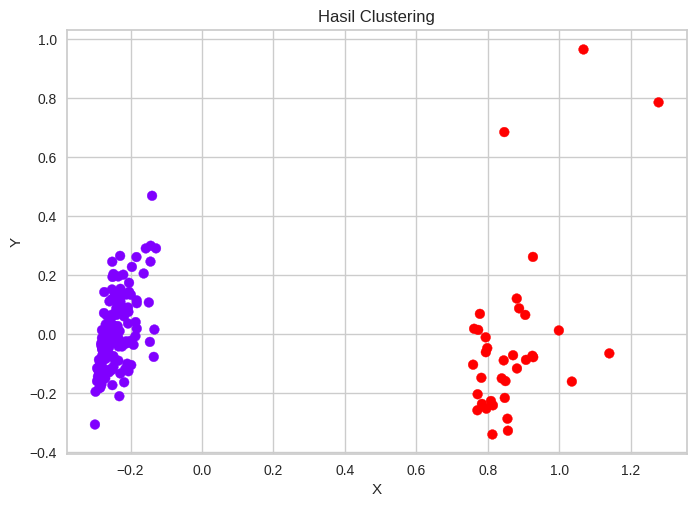

In [87]:
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],c=labels,cmap='rainbow')
plt.title('Hasil Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [88]:
score_pca = silhouette_score(df_pca, labels)
print(f"Silhouette Score: {score_pca}")

Silhouette Score: 0.8749810350427657


In [94]:
#Type your code here
cluster_summary=df_scaled.groupby('cluster').mean()
print(cluster_summary)

          exports   imports    income      gdpp
cluster                                        
0        0.178094  0.262499  0.067252  0.044828
1        0.303426  0.293618  0.371940  0.400666


In [90]:
for column in df_scaled.columns[:-1]:
  print(f"distribusi {column} setiap cluster")
  print(df_scaled.groupby('cluster')[column].describe().reset_index().stack(level=0))

distribusi exports setiap cluster
0  cluster      0.000000
   count      131.000000
   mean         0.178094
   std          0.095365
   min          0.000000
   25%          0.111516
   50%          0.158041
   75%          0.236834
   max          0.468710
1  cluster      1.000000
   count       36.000000
   mean         0.303426
   std          0.206737
   min          0.061489
   25%          0.168672
   50%          0.254093
   75%          0.339265
   max          1.000000
dtype: float64
distribusi imports setiap cluster
0  cluster      0.000000
   count      131.000000
   mean         0.262499
   std          0.112504
   min          0.000000
   25%          0.176700
   50%          0.249716
   75%          0.335093
   max          0.620546
1  cluster      1.000000
   count       36.000000
   mean         0.293618
   std          0.209981
   min          0.077812
   25%          0.162901
   50%          0.235055
   75%          0.344004
   max          1.000000
dtype: float64
di

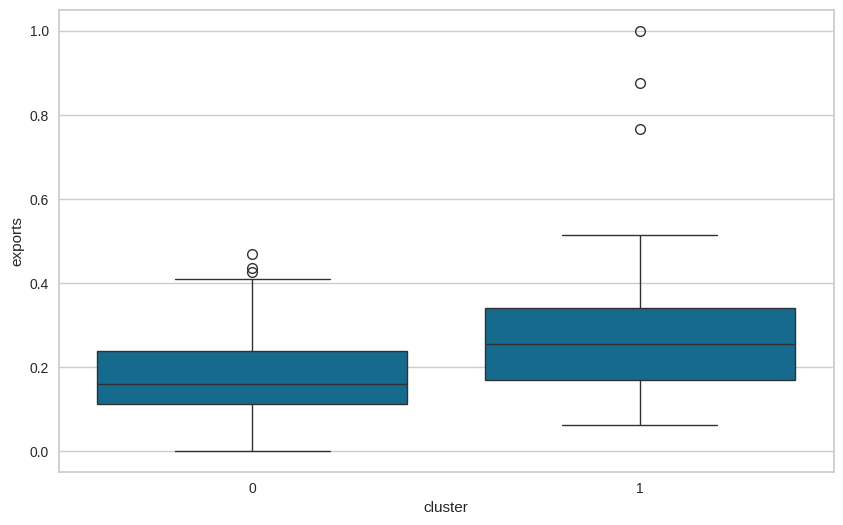

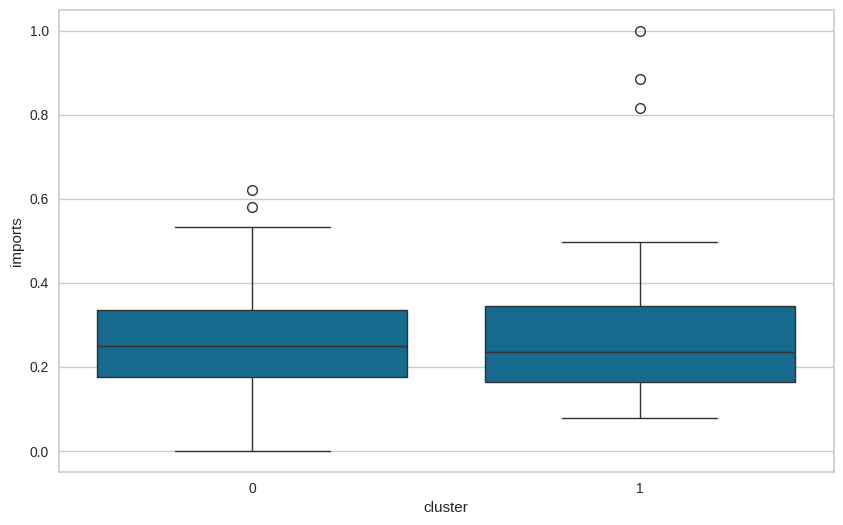

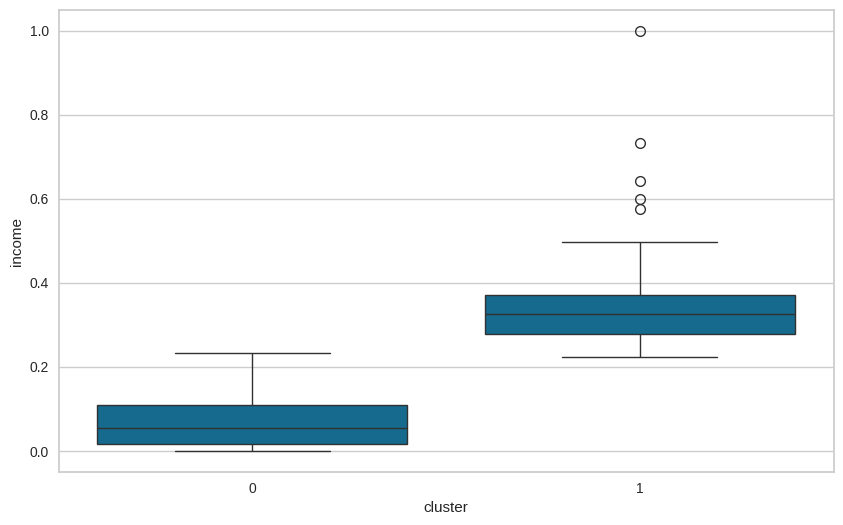

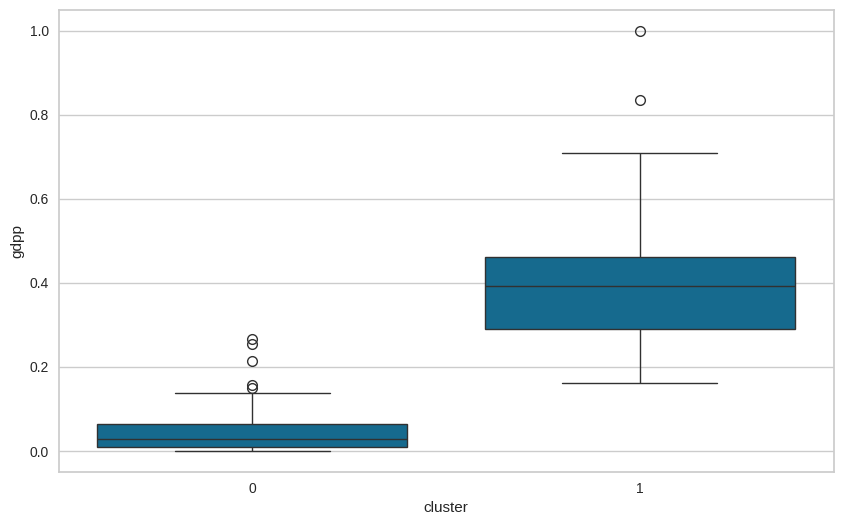

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster',y='exports',data=df_scaled)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='cluster',y='imports',data=df_scaled)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='cluster',y='income',data=df_scaled)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='cluster',y='gdpp',data=df_scaled)
plt.show()

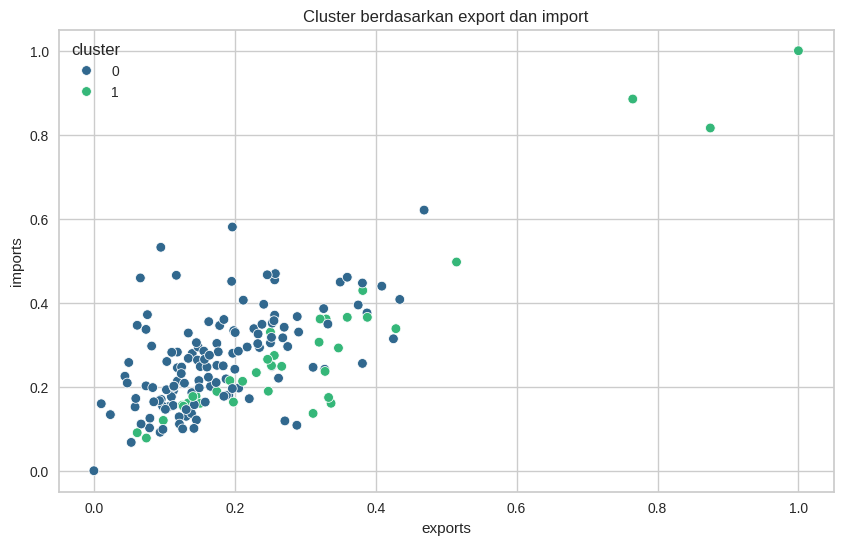

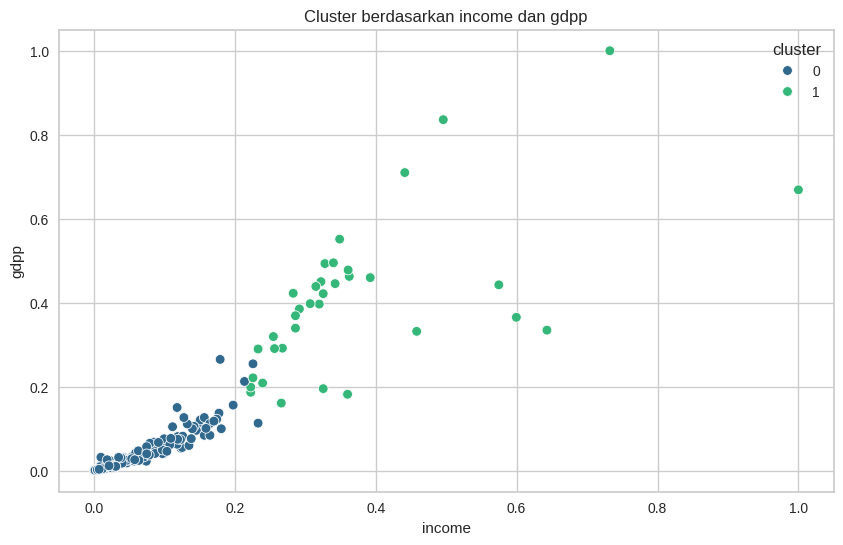

In [92]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='exports',y='imports',hue="cluster",data=df_scaled,palette="viridis")
plt.title("Cluster berdasarkan export dan import")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='income',y='gdpp',hue="cluster",data=df_scaled,palette="viridis")
plt.title("Cluster berdasarkan income dan gdpp")
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0:Negara dengan kondisi ekonomi kurang stabil

2. Cluster 1:Negara dengan kondisi ekonomi stabil
